PROJECT OBJECTIVE: To build a face detection system.

Part A - Q1 A - Import and read ‘images.npy’.

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.mobilenet import preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the .npy file into a NumPy array
img_array = np.load('/content/drive/MyDrive/Computer Vision/CV Project/Images.npy', allow_pickle=True)

This will load the entire .npy file into a NumPy array. The img_array variable will then be a multidimensional array where each element represents a pixel in the image.

In [ ]:
# Print the shape of the array
print(img_array.shape)

(393, 2)


The shape of the img_array variable is (393, 2), then there are 393 elements in the first dimension of the array and 2 elements in the second dimension.

This means that there are 393 elements in the img_array variable, but each element is a two-dimensional array with 2 elements.

In [ ]:
num_images = img_array.shape[0]

In [ ]:
num_images = 0
for image in img_array:
    num_images += 1

In [ ]:
print(num_images)

393


In [ ]:
# Extract the first image from the array
first_image = img_array[0][0]

In [ ]:
# Print the shape of the first image
print(first_image.shape)

(333, 650, 3)


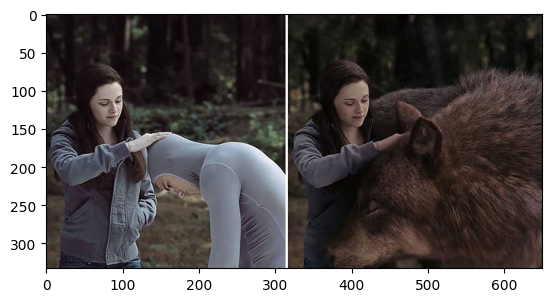

In [ ]:
plt.imshow(first_image)

A more typical image that has three (R, G, B) numbers per pixel has three channels. Such images are called RGB images.

(697, 1280, 4)


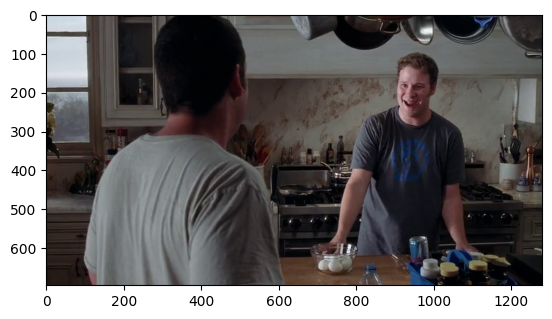

In [ ]:
second_image = img_array[1][0]
print(second_image.shape)
plt.imshow(second_image)

A CMYK image has four channels: cyan, magenta, yellow, and key (black). CMYK is the standard for print, where subtractive coloring is used. A 32-bit CMYK image is made of four 8-bit channels, one for cyan, one for magenta, one for yellow, and one for key color (typically is black).

(291, 600, 4)


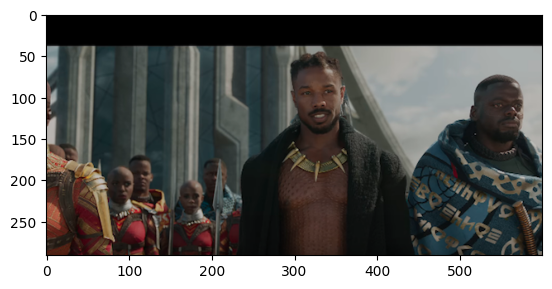

In [ ]:
third_image = img_array[2][0]
print(third_image.shape)
plt.imshow(third_image)

Examining a single sample from the file that was loaded

In [ ]:
img_array[2][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.495, 'y': 0.27147766323024053},
   {'x': 0.595, 'y': 0.46048109965635736}],
  'imageWidth': 600,
  'imageHeight': 291}]

To display 30 images

In [ ]:
fi,ax = plt.subplots(10,3,figsize=(20,30))
row = 0
col = 0
index = 0
for i in range(30):
  ax[row][col].imshow(img_array[index][0], interpolation='nearest')
  index = index + 12
  col = col + 1
  if col > 2:
    row = row + 1
    col = 0
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Part A - Q1 B - Split the data into Features(X) & labels(Y). Unify shape of all the images.
Imp Note: Replace all the pixels within masked area with 1.
Hint: X will comprise of array of image whereas Y will comprise of coordinates of the mask(human face). Observe: data[0], data[0][0], data[0][1]

Either train test split can be used to mention the % of data


For example there are 1000 images , 700 images forms 70 % of the data , In similar way for  409 images, calculate the % of data for train and test


Another way to split :


If df is a data frame which has npy images say 110 images


Train= df [ :100 ] train will have 100 images


Test= df[100:] test will have 10 images

In [ ]:
list(img_array)

[array([array([[[42, 37, 34],
                [56, 51, 48],
                [71, 66, 63],
                ...,
                [23, 33, 34],
                [26, 36, 37],
                [28, 38, 39]],
 
               [[40, 35, 32],
                [51, 46, 43],
                [64, 59, 56],
                ...,
                [27, 36, 35],
                [24, 33, 32],
                [26, 35, 34]],
 
               [[43, 38, 35],
                [51, 46, 43],
                [61, 56, 53],
                ...,
                [28, 30, 27],
                [33, 35, 32],
                [35, 37, 34]],
 
               ...,
 
               [[56, 47, 40],
                [57, 48, 41],
                [61, 52, 45],
                ...,
                [67, 48, 42],
                [55, 35, 28],
                [60, 40, 33]],
 
               [[53, 44, 37],
                [54, 45, 38],
                [57, 48, 41],
                ...,
                [59, 40, 34],
                [60, 

In [ ]:
img_array = np.array(img_array)
print(type(img_array))
print(img_array.shape)

<class 'numpy.ndarray'>
(393, 2)


Checking one sample from the loaded file

In [ ]:
img_array[10]
# img_array[10] refers to the eleventh row (index 10) of the img_array. It returns a single-dimensional array containing all the elements of that specific row.

array([array([[[ 6, 42, 56],
               [ 6, 42, 56],
               [ 6, 42, 56],
               ...,
               [ 9, 47, 60],
               [ 9, 47, 60],
               [ 9, 47, 60]],

              [[ 6, 42, 56],
               [ 6, 42, 56],
               [ 6, 42, 56],
               ...,
               [ 9, 47, 60],
               [ 9, 47, 60],
               [ 9, 47, 60]],

              [[ 6, 42, 56],
               [ 6, 42, 56],
               [ 6, 42, 56],
               ...,
               [ 9, 47, 60],
               [ 9, 47, 60],
               [ 9, 47, 60]],

              ...,

              [[ 3,  3,  3],
               [ 2,  2,  2],
               [ 2,  2,  2],
               ...,
               [ 0,  0,  0],
               [ 0,  0,  0],
               [ 0,  0,  0]],

              [[ 0,  0,  0],
               [ 0,  0,  0],
               [ 1,  1,  1],
               ...,
               [ 8,  8,  8],
               [ 0,  0,  0],
               [ 0,  0,  0]],



In [ ]:
img_array[10][1]    # this provides the x & y coordinates, image width and image height

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.046296296296296294, 'y': 0.16354166666666667},
   {'x': 0.2037037037037037, 'y': 0.2989583333333333}],
  'imageWidth': 648,
  'imageHeight': 960},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.3194444444444444, 'y': 0.1375},
   {'x': 0.5570987654320988, 'y': 0.29583333333333334}],
  'imageWidth': 648,
  'imageHeight': 960},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5648148148148148, 'y': 0.1875},
   {'x': 0.7145061728395061, 'y': 0.30520833333333336}],
  'imageWidth': 648,
  'imageHeight': 960},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7160493827160493, 'y': 0.209375},
   {'x': 0.8333333333333334, 'y': 0.30625}],
  'imageWidth': 648,
  'imageHeight': 960},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.8225308641975309, 'y': 0.23125},
   {'x': 0.9429012345679012, 'y': 0.3177083333333333}],
  'imageWidth': 648,
  'imageHeight': 960}]

array([[[ 6, 42, 56],
        [ 6, 42, 56],
        [ 6, 42, 56],
        ...,
        [ 9, 47, 60],
        [ 9, 47, 60],
        [ 9, 47, 60]],

       [[ 6, 42, 56],
        [ 6, 42, 56],
        [ 6, 42, 56],
        ...,
        [ 9, 47, 60],
        [ 9, 47, 60],
        [ 9, 47, 60]],

       [[ 6, 42, 56],
        [ 6, 42, 56],
        [ 6, 42, 56],
        ...,
        [ 9, 47, 60],
        [ 9, 47, 60],
        [ 9, 47, 60]],

       ...,

       [[ 3,  3,  3],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 1,  1,  1],
        ...,
        [ 8,  8,  8],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 9,  9,  9],
        [ 5,  5,  5],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 3,  3,  3],
        [ 4,  4,  4]]], dtype=uint8)
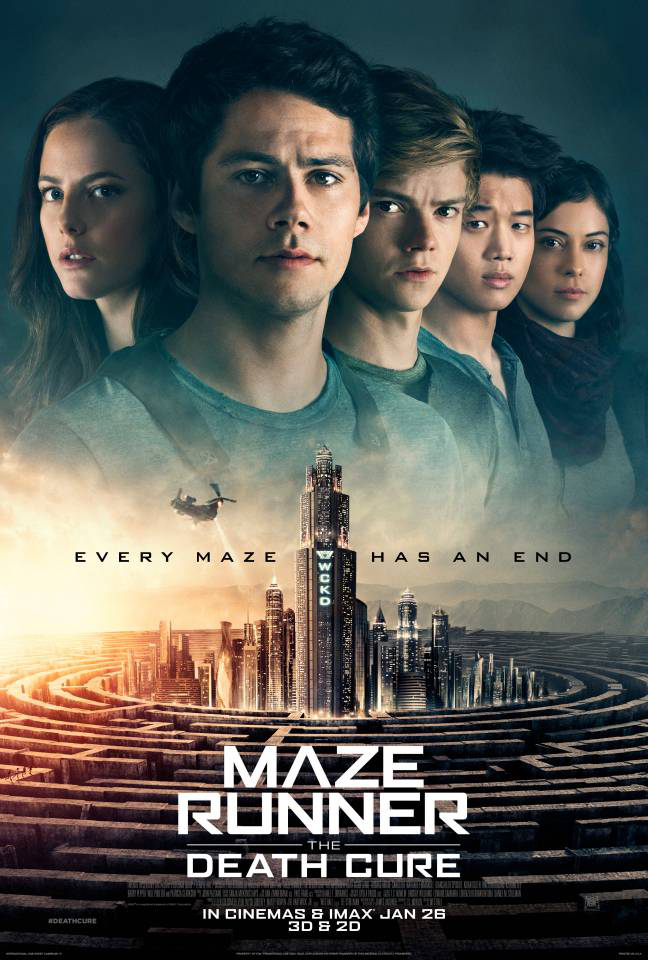

In [ ]:
img_array[10][0]     # this provides the image

(100, 100) means grayscale image.

(100, 100, 3) means RGB image.

(100, 100, 4) means RGBA image.

RGBA stands for red green blue alpha. While it is sometimes described as a color space, it is actually a three-channel RGB color model supplemented with a fourth alpha channel.

Setting image dimensions

In [ ]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

Creating features and labels

In [ ]:
masks = np.zeros((int(img_array.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(img_array.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(img_array.shape[0]):
    img = img_array[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in img_array[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

masks = np.zeros((int(img_array.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
np.zeros: This function creates a NumPy array filled with zeros.
(int(img_array.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH): This tuple defines the shape of the created array.
int(img_array.shape[0]): This ensures that the first dimension of the masks array matches the number of rows in the img_array.
IMAGE_HEIGHT and IMAGE_WIDTH: These constants specify the desired height and width of the masks.
This line of code typically creates a set of blank masks that can be used for various image processing tasks. The masks can be further manipulated or filled with specific values depending on the specific application.


If img_array has 100 rows, then the masks array will have the following dimensions:

masks.shape = (100, 224, 224)

This means it will contain 100 individual masks, each with a size of 224x224 pixels.

The provided code snippet iterates through each row of the img_array and performs the following operations:

Extract Image:
img = img_array[index][0]: This line extracts the first element (index 0) of the current row (accessed by index). This assumes that each row in img_array contains multiple elements, and you are only interested in the first element.
Resize Image:
img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC): This line resizes the extracted image img to the desired dimensions specified by the constants IMAGE_HEIGHT and IMAGE_WIDTH.
cv2.INTER_CUBIC: This parameter specifies the interpolation method used for resizing. In this case, it uses cubic interpolation, which generally produces smoother results compared to other interpolation methods.
Purpose:



This code snippet iterates through all rows of the img_array and resizes each extracted image to a consistent size of IMAGE_HEIGHT x IMAGE_WIDTH pixels using cubic interpolation.

Example:

If img_array has 100 rows, the code will resize 100 images, each with its own unique content extracted from the corresponding row of img_array.

Additional Notes:

It's important to ensure that the first element of each row in img_array actually represents an image.
Depending on the specific context and data structure of img_array, you might need to adjust the indexing or slicing operations to extract the desired images.

img = img[:, :, :3]

slices a 3-dimensional array img and selects only the first three channels.

Here's a breakdown of what each part of the slicing expression does:

[:, :, :]: This selects all rows and all columns of the array.
:3: This selects only the first three elements along the third dimension (channels).
Therefore, the resulting img array will have the same dimensions as the original array, but it will only contain the first three channels.

This type of slicing is commonly used in image processing and computer vision applications to extract specific color channels from an image. For example, if you only need the Red, Green, and Blue (RGB) channels of an image for further processing, you can use this slicing operation to discard the fourth channel (alpha channel).

This except clause will catch any IndexError exceptions raised during the slicing operation and print an informative message.

The continue statement in Python is used to skip the current iteration of a loop and proceed to the next iteration. It is typically used within loops (such as for or while loops) to control the flow of execution.

The line X[index] = preprocess_input(np.array(img, dtype=np.float32)) performs two main operations:

Converts Image to NumPy Array:
np.array(img, dtype=np.float32): This converts the img object to a NumPy array with data type np.float32. This ensures that the image data is represented as floating-point values.
Preprocesses Image:
preprocess_input(np.array(img, dtype=np.float32)): This applies a preprocessing function called preprocess_input to the NumPy array representation of the image. This function is likely specific to your chosen image processing library or framework and performs necessary transformations on the image data before it can be used for training a model.
Purpose:

This line prepares the image data for further processing or training by converting it to a suitable format and applying necessary preprocessing steps.
Additional Notes:

The specific details of the preprocess_input function and its effects on the image data depend on the particular library or framework being used.
It is important to ensure that the preprocess_input function is compatible with the type of image data and the model being trained.
The variable index is used to assign the processed image data to the corresponding element of the X array.

The provided code snippet iterates through a list of elements in img_array[index][1] and uses the coordinates from each element to draw rectangles on the corresponding mask in the masks array.

The provided code snippet iterates through a list of elements in img_array[index][1] and uses the coordinates from each element to draw rectangles on the corresponding mask in the masks array.

Explanation:

Looping Through Elements:
for i in img_array[index][1]: This loop iterates through each element in the second element of the row at index in the img_array.
Extracting Coordinates:
int(i["points"][0]['x'] * IMAGE_WIDTH): This calculates the x-coordinate of the first point in the rectangle by multiplying the x value from the element by the IMAGE_WIDTH constant.
int(i["points"][1]['x'] * IMAGE_WIDTH): This calculates the x-coordinate of the second point in the rectangle.
int(i["points"][0]['y'] * IMAGE_HEIGHT): This calculates the y-coordinate of the first point in the rectangle by multiplying the y value from the element by the IMAGE_HEIGHT constant.
int(i["points"][1]['y'] * IMAGE_HEIGHT): This calculates the y-coordinate of the second point in the rectangle.
Drawing Rectangles on Masks:
masks[index][y1:y2, x1:x2] = 1: This line uses the calculated coordinates to draw a rectangle on the mask at the corresponding index in the masks array.
y1:y2: This specifies the range of rows to fill in the rectangle.
x1:x2: This specifies the range of columns to fill in the rectangle.
= 1: This sets the pixel values within the rectangle to 1.
Purpose:

This code snippet appears to be creating binary masks where each mask corresponds to an image in the img_array.
The rectangles drawn on the masks likely represent areas of interest or specific regions within the images.

In [ ]:
masks

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

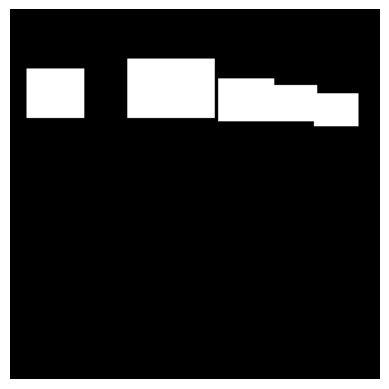

In [ ]:
# Select a mask to display
mask = masks[10]

# Display the mask
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.show()

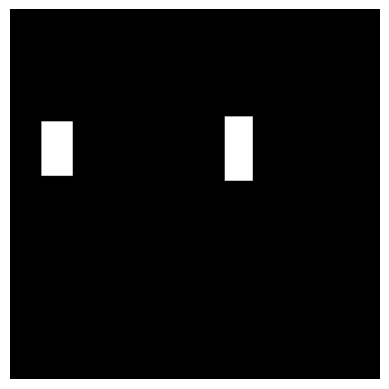

In [ ]:
# Select a mask to display
mask = masks[0]

# Display the mask
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.show()

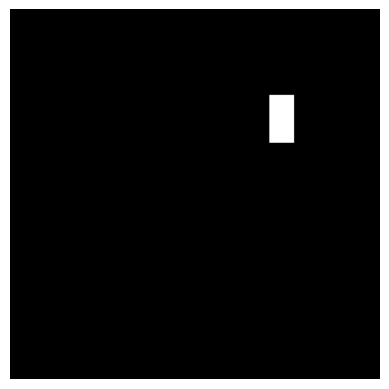

In [ ]:
# Select a mask to display
mask = masks[1]

# Display the mask
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.show()

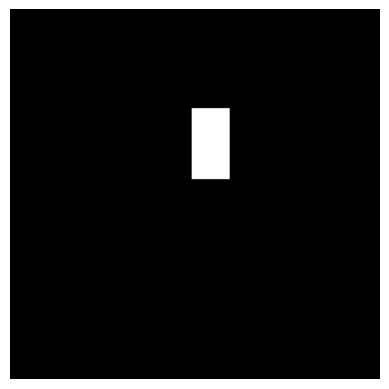

In [ ]:
# Select a mask to display
mask = masks[2]

# Display the mask
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.show()

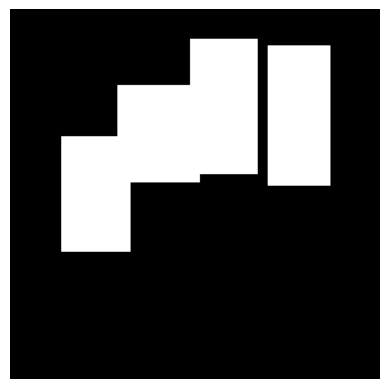

In [ ]:
# Select a mask to display
mask = masks[70]

# Display the mask
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.show()

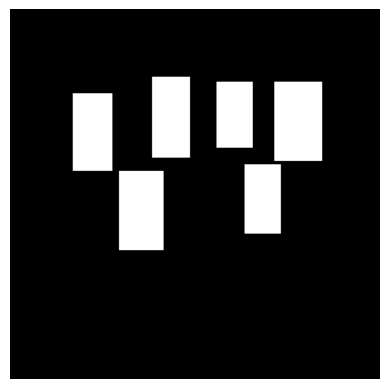

In [ ]:
# Select a mask to display
mask = masks[3]

# Display the mask
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.show()

Part A - Q1 C - Split the data into train and test[400:9].

400 images in training
9 images in testing data

Here, there are only 393 images, so splitting into 384 for train and 9 for test, as confirmed by the program manager.

Training data

In [ ]:
X_train = X[:384]          # X_train will contain all the elements of X from index 0 to index 383 (inclusive), which are the first 384 elements.
y_train = masks[:384]      # y_train will contain the first 384 elements of masks.

In [ ]:
print('Shape of X_train: ', X_train.shape)

Shape of X_train:  (384, 224, 224, 3)


In [ ]:
print('Shape of y_train: ', y_train.shape)

Shape of y_train:  (384, 224, 224)


Testing data

In [ ]:
X_test = X[384:]           # X_test will contain all the elements of X from index 384 onwards.
y_test = masks[384:]       # y_test will contain all the elements of masks from index 384 onwards.

In [ ]:
print('Shape of X_test: ', X_test.shape)

Shape of X_test:  (9, 224, 224, 3)


In [ ]:
print('Shape of y_test: ', y_test.shape)

Shape of y_test:  (9, 224, 224)


Part A - Q1 D - Select random image from the train data and display original image and masked image.

Image array: [[[ 0.1686275   0.1686275   0.09019613]
  [ 0.22352946  0.22352946  0.14509809]
  [ 0.25490201  0.25490201  0.17647064]
  ...
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.14509809  0.12156868  0.06666672]]

 [[ 0.18431377  0.18431377  0.10588241]
  [ 0.22352946  0.22352946  0.14509809]
  [ 0.27058828  0.27058828  0.19215691]
  ...
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.15294123  0.12941182  0.07450986]]

 [[ 0.17647064  0.17647064  0.10588241]
  [ 0.21568632  0.21568632  0.14509809]
  [ 0.27058828  0.27058828  0.20000005]
  ...
  [ 0.15294123  0.12941182  0.07450986]
  [ 0.15294123  0.12941182  0.07450986]
  [ 0.14509809  0.12156868  0.06666672]]

 ...

 [[-0.00392157  0.00392163 -0.04313725]
  [-0.00392157  0.01176476 -0.04313725]
  [ 0.04313731  0.05098045  0.00392163]
  ...
  [-0.38039213 -0.38039213 -0.40392154]
  [-0.43529409 -0.4588235  -0.52941179]
  [-0.45098037 -0.49019605 -0.5

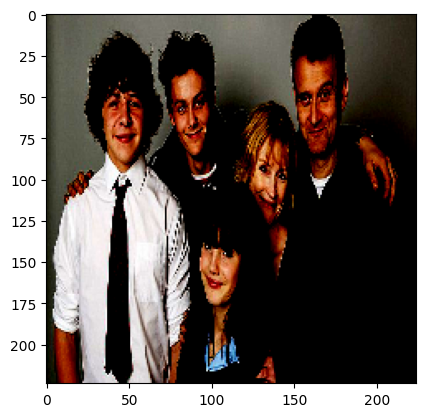

In [ ]:
n = 5
print("Image array:", X_train[n])
plt.imshow(X_train[n])

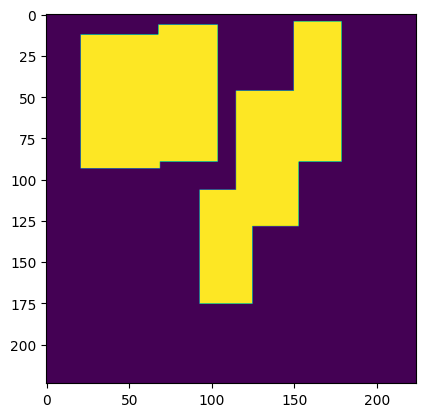

In [ ]:
plt.imshow(masks[n])

Part A - Q2 A - Design a face mask detection model.

Hint: 1. Use MobileNet architecture for initial pre-trained non-trainable layers.
Hint: 2. Add appropriate Upsampling layers to imitate U-net architecture.

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
def create_model(trainable = True):
    IMG_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, 3)
    model = MobileNet(input_shape = IMG_SHAPE, alpha = 1.0, include_top = False, weights = 'imagenet')
    for layer in model.layers:
        layer.trainable = trainable

    block0 = model.get_layer('conv_pw_1_relu').output
    block1 = model.get_layer('conv_pw_3_relu').output
    block2 = model.get_layer('conv_pw_5_relu').output
    block3 = model.get_layer('conv_pw_11_relu').output
    block4 = model.get_layer('conv_pw_13_relu').output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size = 1, activation = "sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs = model.input, outputs = x)

Call the create_model function

Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [ ]:
model = create_model()

17225924/17225924 [==============================] - 2s 0us/step


Print summary

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)         128       ['conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['conv1_bn[0][0]']        

Part 1.2 b - Design your own Dice Coefficient and
Loss function.

Developing a function for dice coefficient calculation

In [ ]:
from tensorflow import reduce_sum
from tensorflow.keras.backend import epsilon

def dice_coefficient(y_true, y_pred):
    numerator = 2 * reduce_sum(y_true * y_pred)
    denominator = reduce_sum(y_true + y_pred)
    return numerator / (denominator + epsilon())

Determining the loss function

In [ ]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())


Part 1.2 c - Train and tune the model as required.

Model compilation with the parameters listed below

loss: utilising the previously established loss function

Adam optimizer is the one being used.

metrics: applying the previously provided dice_coefficient function

In [ ]:
model.compile(loss=loss, optimizer='adam', metrics=[dice_coefficient])

Describe callbacks

ModelCheckpoint Utilisation

Making Use of EarlyStopping

ReducingLROnPlateau


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define the filepath with .weights.h5 extension
filepath = "model-{loss:.2f}.weights.h5"

checkpoint = ModelCheckpoint(filepath, monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min")
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

Model fitting with the parameters shown below

epochs: 5

batch_size: 1

callbacks: using the callbacks defined above

In [51]:
model.fit(X_train, y_train, epochs=5, batch_size=1, callbacks=[checkpoint, reduce_lr, stop])

Epoch 1/5
383/384 [============================>.] - ETA: 0s - loss: 0.8409 - dice_coefficient: 0.6086
Epoch 1: loss improved from 1.21913 to 0.84112, saving model to model-0.84.weights.h5
384/384 [==============================] - 12s 31ms/step - loss: 0.8411 - dice_coefficient: 0.6082 - lr: 0.0010
Epoch 2/5
383/384 [============================>.] - ETA: 0s - loss: 0.7128 - dice_coefficient: 0.6530
Epoch 2: loss improved from 0.84112 to 0.71385, saving model to model-0.71.weights.h5
384/384 [==============================] - 12s 31ms/step - loss: 0.7139 - dice_coefficient: 0.6529 - lr: 0.0010
Epoch 3/5
383/384 [============================>.] - ETA: 0s - loss: 0.6244 - dice_coefficient: 0.6901
Epoch 3: loss improved from 0.71385 to 0.62611, saving model to model-0.63.weights.h5
384/384 [==============================] - 12s 32ms/step - loss: 0.6261 - dice_coefficient: 0.6892 - lr: 0.0010
Epoch 4/5
383/384 [============================>.] - ETA: 0s - loss: 0.6010 - dice_coefficient: 0

The model was only fitted for five epochs due to system limitations, but the test result should still be valid.


Part 1.2 d - Evaluate and share insights on
performance of the model.

Epoch 1: loss improved from 1.21913 to 0.84112.

Epoch 2: loss improved from 0.84112 to 0.71385.

Epoch 3: loss improved from 0.71385 to 0.62611

Epoch 4: loss improved from 0.62611 to 0.60174

Epoch 5: loss improved from 0.60174 to 0.56948

The model achieved a Dice Coefficient of 70.99%, which is way above 50% after training for 5 epochs, which is considered good for testing on the test image.

In [52]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8130072355270386
Test accuracy: 0.5848332047462463


The provided output shows the test loss and test accuracy of a machine learning model.

Test loss: 0.8130072355270386

Test accuracy: 0.5848332047462463

Evaluation:

The model achieves a test accuracy of approximately 58.48%, which means it correctly classifies 58.48% of the examples in the test set.
The test loss value of 0.8130072355270386 indicates that the model is making some errors on the test set.

Insights:

The model's performance is moderate, as evidenced by the test accuracy and loss values.
There is room for improvement, as the model is misclassifying nearly half of the examples in the test set.
Further analysis is needed to understand the specific types of errors the model is making and identify potential areas for improvement.

Interpretation:

Test Loss: The test loss value indicates how well the model performs on unseen data (the test set). A lower test loss value generally means the model is making more accurate predictions.

Test Accuracy: The test accuracy value indicates the percentage of correctly classified examples in the test set. In this case, the model correctly classifies approximately 58.48% of the examples in the test set.

Possible Next Steps:

a. Analyze the model's predictions on the test set to identify misclassified examples and understand why the model made mistakes. This can be done by visualizing the misclassified examples and examining the model's output probabilities.
b. Experiment with different model architectures, hyperparameters, or training strategies to improve the model's performance. For example, increasing the number of training epochs, using a different optimizer, or adding regularization techniques may help to reduce the test loss and improve accuracy.
c. Consider collecting more training data or using data augmentation techniques to improve the model's generalization ability. This can help the model learn more effectively and reduce overfitting.

Overall, the provided test loss and accuracy values suggest that the model has moderate performance and there is room for improvement. Further analysis and experimentation are needed to identify specific areas where the model can be improved.

Part 1.3 - Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image.

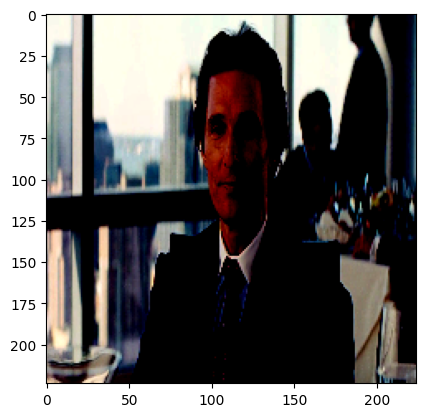

In [53]:
# Displaying the test image
i = 3
plt.imshow(X_test[i])

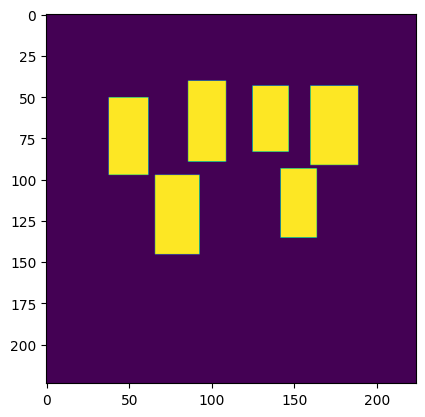

In [54]:
# Display the test image's original mask
plt.imshow(masks[i])

In [55]:
pred_mask = cv2.resize(1.0 * (model.predict(x=np.array([X_test[i]]))[0] > 0.5), (IMAGE_WIDTH, IMAGE_HEIGHT))

1/1 [==============================] - 0s 23ms/step


Applying the mask on the trial picture

Setting the alpha parameter in imshow to 0.9 (i.e., greater than 0.5)

This line displays the predicted mask (pred_mask) on top of the original image with a transparency value of 0.9. This allows both the original image and the predicted mask to be visible simultaneously.

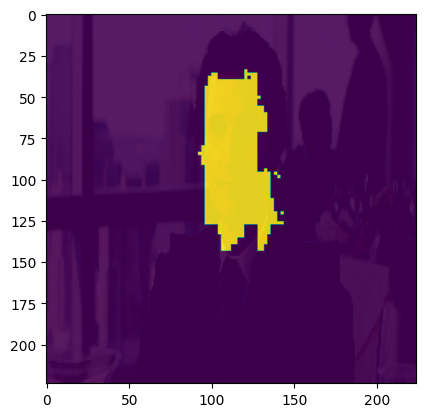

In [56]:
plt.imshow(X_test[i])
plt.imshow(pred_mask, alpha=0.9)

This code snippet takes a single image from the test set, uses the trained model to predict the segmentation mask, applies a threshold to binarize the mask, and then resizes the mask to the desired dimensions.
The resulting pred_mask variable contains the predicted segmentation mask for the current image.